In [1]:
# %pip install plotly

In [2]:
# %pip install --upgrade nbformat

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px

from tqdm import tqdm

from shapely.geometry import box


Cannot find header.dxf (GDAL_DATA is not defined)


In [4]:
template_df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Arjen_Vector_Template.csv")
template_df.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat
0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456
1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940
2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425
3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574
4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348


In [5]:

circle_center_all = gpd.GeoDataFrame(
    template_df, geometry=gpd.points_from_xy(template_df.Intersect_lon, template_df.Intersect_lat), crs="EPSG:4326"
)
circle_center_all.head()

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry
0,BOX_028_183_0,CHL,South America,Chile,-74.386310,-50.377659,-74.390966,-50.382558,-74.395623,-50.387456,POINT (-74.39097 -50.38256)
1,BOX_028_183_1,CHL,South America,Chile,-74.382469,-50.379144,-74.387125,-50.384042,-74.391782,-50.388940,POINT (-74.38713 -50.38404)
2,BOX_028_183_2,CHL,South America,Chile,-74.378628,-50.380629,-74.383284,-50.385527,-74.387941,-50.390425,POINT (-74.38328 -50.38553)
3,BOX_028_183_3,CHL,South America,Chile,-74.373950,-50.382583,-74.379517,-50.387079,-74.385083,-50.391574,POINT (-74.37952 -50.38708)
4,BOX_028_183_4,CHL,South America,Chile,-74.370425,-50.384358,-74.375991,-50.388853,-74.381558,-50.393348,POINT (-74.37599 -50.38885)


In [6]:
IPCC=gpd.read_file(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\IPCC-WGI-reference-regions-v4.gpkg")
IPCC.head()

,Continent,Type,Name,Acronym,geometry
0,POLAR,Land,Greenland/Iceland,GIC,"MULTIPOLYGON (((-10.00000 62.00000, -10.43750 ..."
1,NORTH-AMERICA,Land,N.W.North-America,NWN,"MULTIPOLYGON (((-105.00000 50.00000, -105.4386..."
2,NORTH-AMERICA,Land,N.E.North-America,NEN,"MULTIPOLYGON (((-50.00000 50.00000, -50.44000 ..."
3,NORTH-AMERICA,Land,W.North-America,WNA,"MULTIPOLYGON (((-130.00000 50.00000, -129.5614..."
4,NORTH-AMERICA,Land,C.North-America,CNA,"MULTIPOLYGON (((-90.00000 50.00000, -90.00000 ..."


In [7]:
region_acronym= "CAR"
region_gdf=IPCC.loc[IPCC["Acronym"]==region_acronym,:]
region_gdf


,Continent,Type,Name,Acronym,geometry
8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,"MULTIPOLYGON (((-75.00000 12.00000, -75.32609 ..."


In [8]:

# circle_center=region_gdf.sjoin(circle_center_all)
circle_center=circle_center_all.sjoin(region_gdf)
circle_center

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,index_right,Continent,Type,Name,Acronym
553337,BOX_116_353_2,COL,South America,Colombia,-71.874132,12.257491,-71.879805,12.250684,-71.885477,12.243877,POINT (-71.87980 12.25068),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
553338,BOX_116_353_3,COL,South America,Colombia,-71.869660,12.252394,-71.876981,12.247308,-71.884303,12.242222,POINT (-71.87698 12.24731),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
553339,BOX_116_353_4,COL,South America,Colombia,-71.866684,12.243923,-71.875632,12.243144,-71.884580,12.242366,POINT (-71.87563 12.24314),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
553340,BOX_116_353_5,COL,South America,Colombia,-71.866286,12.239551,-71.875233,12.238772,-71.884181,12.237993,POINT (-71.87523 12.23877),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
553341,BOX_116_353_6,COL,South America,Colombia,-71.865960,12.235759,-71.874835,12.234400,-71.883710,12.233041,POINT (-71.87483 12.23440),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847873,BOX_139_002_61,DOM,North America,Dominican Republic,-71.660191,17.969154,-71.668186,17.965259,-71.676182,17.961363,POINT (-71.66819 17.96526),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
847874,BOX_139_002_62,DOM,North America,Dominican Republic,-71.657870,17.964549,-71.666228,17.961418,-71.674587,17.958286,POINT (-71.66623 17.96142),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
847875,BOX_139_002_63,DOM,North America,Dominican Republic,-71.656224,17.960573,-71.664583,17.957442,-71.672941,17.954311,POINT (-71.66458 17.95744),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
847876,BOX_139_002_64,DOM,North America,Dominican Republic,-71.654578,17.956598,-71.662937,17.953466,-71.671295,17.950335,POINT (-71.66294 17.95347),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR


In [9]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Global_Erosion_rate_PC.csv")
# df=df.drop(columns=['index_right'])
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points=data_points.sjoin(region_gdf)
print (data_points.columns)
data_points.index=range(0,len(data_points.index))
data_points

Index(['changerate', 'changerate_unc', 'coastline_idint', 'continent',
       'country', 'country_id', 'err_changerate', 'err_timespan', 'intercept',
       'intercept_unc', 'lat', 'lon', 'low_detect_shlined', 'no_sedcomp',
       'no_shorelines', 'outliers', 'rmse', 'sandy', 'sp', 'time', 'timespan',
       'transect_geom', 'transect_id', 'geometry', 'index_right', 'Continent',
       'Type', 'Name', 'Acronym'],
      dtype='object')


,changerate,changerate_unc,coastline_idint,continent,country,country_id,err_changerate,err_timespan,intercept,intercept_unc,...,time,timespan,transect_geom,transect_id,geometry,index_right,Continent,Type,Name,Acronym
0,3.110021,9.555368,8382.0,b'South America',b'Colombia',b'COL',1.0,1.0,1385.877580,82.013044,...,1984-01-01,14.0,"b'LINESTRING (-71.8794042469 12.2620613616, -7...",b'BOX_116_353_0',POINT (-71.87940 12.26206),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
1,0.007411,0.965293,8382.0,b'South America',b'Colombia',b'COL',1.0,1.0,1626.874580,8.285346,...,1984-01-01,14.0,b'LINESTRING (-71.8776148657 12.26026222619999...,b'BOX_116_353_1',POINT (-71.87761 12.26026),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
2,-16.441771,4.819320,8382.0,b'South America',b'Colombia',b'COL',1.0,1.0,804.548091,45.166399,...,1984-01-01,16.0,"b'LINESTRING (-71.8741320821 12.2574906196, -7...",b'BOX_116_353_2',POINT (-71.87413 12.25749),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
3,0.335379,0.111834,8382.0,b'South America',b'Colombia',b'COL',1.0,1.0,583.757079,2.492631,...,1984-01-01,37.0,"b'LINESTRING (-71.8696596677 12.2523944854, -7...",b'BOX_116_353_3',POINT (-71.86966 12.25239),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
4,1.878836,1.154402,8382.0,b'South America',b'Colombia',b'COL',1.0,1.0,1006.649872,27.896532,...,1984-01-01,37.0,b'LINESTRING (-71.86668410899999 12.2439230964...,b'BOX_116_353_4',POINT (-71.86668 12.24392),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38965,0.288753,0.071436,8477.0,b'North America',b'Dominican Republic',b'DOM',1.0,1.0,892.636242,1.591373,...,1984-01-01,37.0,"b'LINESTRING (-71.6601908294 17.9691544308, -7...",b'BOX_139_002_61',POINT (-71.66019 17.96915),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
38966,0.166001,0.114090,8477.0,b'North America',b'Dominican Republic',b'DOM',1.0,1.0,887.783993,2.570342,...,1984-01-01,37.0,"b'LINESTRING (-71.6578700793 17.9645487929, -7...",b'BOX_139_002_62',POINT (-71.65787 17.96455),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
38967,0.092415,0.055471,8477.0,b'North America',b'Dominican Republic',b'DOM',1.0,1.0,931.399153,1.250820,...,1984-01-01,37.0,"b'LINESTRING (-71.6562242238 17.9605733279, -7...",b'BOX_139_002_63',POINT (-71.65622 17.96057),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
38968,-0.027472,0.017220,8477.0,b'North America',b'Dominican Republic',b'DOM',1.0,1.0,1061.648069,0.392139,...,1984-01-01,37.0,"b'LINESTRING (-71.6545783683 17.9565977736, -7...",b'BOX_139_002_64',POINT (-71.65458 17.95660),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR


In [10]:
check_distance=0.02



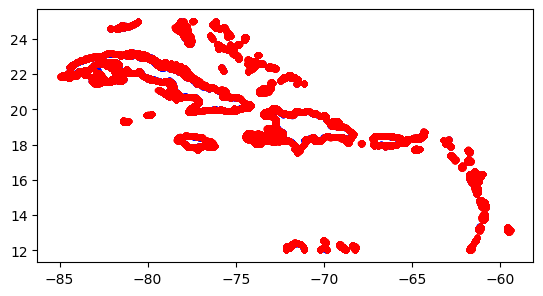

In [11]:


# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in circle_center['geometry']]})



# Step 2: Visualize these 2 geospatial datasets on a map
fig, ax = plt.subplots()
data_points.plot(ax=ax, color='blue', markersize=10)
circle_center.plot(ax=ax, color='red', markersize=10)
buffer_circles.boundary.plot(ax=ax, color='red')
plt.show()


In [12]:
circle_center.index=buffer_circles.index
circle_center

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,index_right,Continent,Type,Name,Acronym
0,BOX_116_353_2,COL,South America,Colombia,-71.874132,12.257491,-71.879805,12.250684,-71.885477,12.243877,POINT (-71.87980 12.25068),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
1,BOX_116_353_3,COL,South America,Colombia,-71.869660,12.252394,-71.876981,12.247308,-71.884303,12.242222,POINT (-71.87698 12.24731),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
2,BOX_116_353_4,COL,South America,Colombia,-71.866684,12.243923,-71.875632,12.243144,-71.884580,12.242366,POINT (-71.87563 12.24314),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
3,BOX_116_353_5,COL,South America,Colombia,-71.866286,12.239551,-71.875233,12.238772,-71.884181,12.237993,POINT (-71.87523 12.23877),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
4,BOX_116_353_6,COL,South America,Colombia,-71.865960,12.235759,-71.874835,12.234400,-71.883710,12.233041,POINT (-71.87483 12.23440),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37504,BOX_139_002_61,DOM,North America,Dominican Republic,-71.660191,17.969154,-71.668186,17.965259,-71.676182,17.961363,POINT (-71.66819 17.96526),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
37505,BOX_139_002_62,DOM,North America,Dominican Republic,-71.657870,17.964549,-71.666228,17.961418,-71.674587,17.958286,POINT (-71.66623 17.96142),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
37506,BOX_139_002_63,DOM,North America,Dominican Republic,-71.656224,17.960573,-71.664583,17.957442,-71.672941,17.954311,POINT (-71.66458 17.95744),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR
37507,BOX_139_002_64,DOM,North America,Dominican Republic,-71.654578,17.956598,-71.662937,17.953466,-71.671295,17.950335,POINT (-71.66294 17.95347),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR


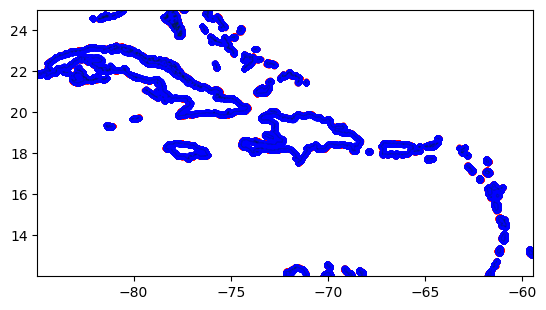

In [13]:
fig, ax = plt.subplots()

buffer_circles.boundary.plot(ax=ax, color='green',linewidth=0.005)
circle_center.plot(ax=ax, color='red', markersize=10)
data_points.plot(ax=ax, color='blue', markersize=10)


# Set the axis limits to the extent of circle_center
xmin, ymin, xmax, ymax = circle_center.total_bounds

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.show()


In [15]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
for data_point in [data_points]: 
    for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
        #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
        inside_points = data_point[data_point.within(buffer_circles.loc[i,'geometry'])]
        
        # Calculate distance
    
        inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

        # Sort inside_points by 'distance' in ascending order
        sorted_inside_points = inside_points.sort_values(by='distance')

        # Select the top 2 rows
        nearest_point = sorted_inside_points.head(1)

        column_name_ = "Shoreline_Change_Rate"
        orig_name="changerate"

        if len(inside_points['geometry'])==0:
                circle_center.loc[i,'sampled points']=0
                circle_center.loc[i, column_name_]=np.nan
                continue
        
        if len(inside_points['geometry'])>0:
            circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
            circle_center.loc[i, column_name_]=nearest_point[orig_name].values
            continue
    # Suppress all warnings
    warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 37509/37509 [26:33<00:00, 23.54it/s]


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,index_right,Continent,Type,Name,Acronym,sampled points,Shoreline_Change_Rate
0,BOX_116_353_2,COL,South America,Colombia,-71.874132,12.257491,-71.879805,12.250684,-71.885477,12.243877,POINT (-71.87980 12.25068),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-16.441771
1,BOX_116_353_3,COL,South America,Colombia,-71.869660,12.252394,-71.876981,12.247308,-71.884303,12.242222,POINT (-71.87698 12.24731),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.335379
2,BOX_116_353_4,COL,South America,Colombia,-71.866684,12.243923,-71.875632,12.243144,-71.884580,12.242366,POINT (-71.87563 12.24314),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,1.878836
3,BOX_116_353_5,COL,South America,Colombia,-71.866286,12.239551,-71.875233,12.238772,-71.884181,12.237993,POINT (-71.87523 12.23877),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,8.0,0.490707
4,BOX_116_353_6,COL,South America,Colombia,-71.865960,12.235759,-71.874835,12.234400,-71.883710,12.233041,POINT (-71.87483 12.23440),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-0.052123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37504,BOX_139_002_61,DOM,North America,Dominican Republic,-71.660191,17.969154,-71.668186,17.965259,-71.676182,17.961363,POINT (-71.66819 17.96526),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.288753
37505,BOX_139_002_62,DOM,North America,Dominican Republic,-71.657870,17.964549,-71.666228,17.961418,-71.674587,17.958286,POINT (-71.66623 17.96142),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.166001
37506,BOX_139_002_63,DOM,North America,Dominican Republic,-71.656224,17.960573,-71.664583,17.957442,-71.672941,17.954311,POINT (-71.66458 17.95744),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,0.092415
37507,BOX_139_002_64,DOM,North America,Dominican Republic,-71.654578,17.956598,-71.662937,17.953466,-71.671295,17.950335,POINT (-71.66294 17.95347),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-0.027472


In [16]:
circle_center.describe()

,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,index_right,sampled points,Shoreline_Change_Rate
count,37509.000000,37509.000000,37509.000000,37509.000000,37509.000000,37509.000000,37509.0,37509.000000,37507.000000
mean,-74.929397,20.570424,-74.929338,20.570453,-74.929276,20.570481,8.0,11.683436,-7.670425
std,6.112249,3.063988,6.112431,3.064050,6.112619,3.064127,0.0,4.724474,86.478755
min,-84.942014,11.996820,-84.950876,12.000458,-84.959783,11.992212,8.0,0.000000,-999.000000
25%,-79.036895,18.443619,-79.037986,18.447064,-79.038147,18.450788,8.0,8.000000,-0.282971
50%,-76.242192,21.533002,-76.238532,21.531926,-76.237924,21.531264,8.0,9.000000,0.002060
75%,-71.802978,22.683746,-71.803416,22.678425,-71.805816,22.674398,8.0,14.000000,0.233512
max,-59.431497,25.007935,-59.422593,24.999901,-59.413637,25.003622,8.0,39.000000,1052.098091


In [17]:
circle_center.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Caribbean_Erosion_rate_PC.csv",index=False)

In [18]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Caribbean_Erosion_rate_PC.csv")
df

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,geometry,index_right,Continent,Type,Name,Acronym,sampled points,Shoreline_Change_Rate
0,BOX_116_353_2,COL,South America,Colombia,-71.874132,12.257491,-71.879805,12.250684,-71.885477,12.243877,POINT (-71.8798045985 12.250683718),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-16.441771
1,BOX_116_353_3,COL,South America,Colombia,-71.869660,12.252394,-71.876981,12.247308,-71.884303,12.242222,POINT (-71.87698143850001 12.247308305),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.335379
2,BOX_116_353_4,COL,South America,Colombia,-71.866684,12.243923,-71.875632,12.243144,-71.884580,12.242366,POINT (-71.8756318462 12.2431443263),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,1.878836
3,BOX_116_353_5,COL,South America,Colombia,-71.866286,12.239551,-71.875233,12.238772,-71.884181,12.237993,POINT (-71.8752334021 12.2387721729),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,8.0,0.490707
4,BOX_116_353_6,COL,South America,Colombia,-71.865960,12.235759,-71.874835,12.234400,-71.883710,12.233041,POINT (-71.8748349513 12.2343999454),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-0.052123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37504,BOX_139_002_61,DOM,North America,Dominican Republic,-71.660191,17.969154,-71.668186,17.965259,-71.676182,17.961363,POINT (-71.6681862112 17.9652589019),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.288753
37505,BOX_139_002_62,DOM,North America,Dominican Republic,-71.657870,17.964549,-71.666228,17.961418,-71.674587,17.958286,POINT (-71.6662284163 17.9614175026),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,9.0,0.166001
37506,BOX_139_002_63,DOM,North America,Dominican Republic,-71.656224,17.960573,-71.664583,17.957442,-71.672941,17.954311,POINT (-71.664582619 17.9574419454),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,0.092415
37507,BOX_139_002_64,DOM,North America,Dominican Republic,-71.654578,17.956598,-71.662937,17.953466,-71.671295,17.950335,POINT (-71.6629367897 17.953466310899998),8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,7.0,-0.027472


In [ ]:

# Define your discrete color scale
color_scale = ['#D9EAD3', '#A9D08E', '#F9D670', '#FFA94D', '#FF704D', '#FF4D4D']

# Create the scatter mapbox plot using Plotly Graph Objects
fig2 = go.Figure(go.Scattermapbox(
    lat=data_point['lat'],
    lon=data_point['lon'],
    mode='markers',
    marker=dict(
        size=15,
        color='red',  # Set color to red

        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            title="Extreme Sea Levels, offshore"  # Set color bar title
        )
    ),
    hoverinfo='text',
    hovertext=data_point['esl'],
    showlegend=False
))
for idx, data_point in enumerate(data_points):
    # Create the scatter mapbox plot using Plotly Graph Objects
    fig2.add_trace(go.Scattermapbox(
        lat=df['Intersect_lat']+ idx/1000,
        lon=df['Intersect_lon'],
        mode='markers',
        marker=dict(
        size=10,
        color=df[df.columns[12]],  
        ),
        hoverinfo='text',
        hovertext=df[df.columns[12+idx]],
        name=df.columns[12+idx]
    ))

# Update layout properties
fig2.update_layout(
    title="Extreme Sea Level Variation in the Caribbean",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=8,
        center=dict(lat=12.18625, lon=-69.00168)
    ),		

    margin=dict(l=0, r=50, b=0, t=50),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
)
)

# Show the plot
fig2.show()

